In [94]:
import pandas as pd
import seaborn as sns

In [95]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,item_id,relevance,quality,content,label
0,101,4,5,The hard truth is that if you don't know what ...,Conservative
1,102,4,4,The hard truth is that the vast majority of pe...,Conservative
2,103,1,3,The hard truth is that the U.S. is going to ha...,Conservative
3,104,2,2,The hard truth is that there is no way that th...,Conservative
4,105,3,3,The hard truth is that the world's most powerf...,Conservative


In [96]:
dataset[["relevance", "quality"]].describe()

,relevance,quality
count,313.000000,313.000000
mean,2.686901,3.715655
std,1.331709,0.905279
min,1.000000,1.000000
25%,1.000000,3.000000
50%,3.000000,4.000000
75%,4.000000,4.000000
max,5.000000,5.000000


In [109]:
dataset[["relevance", "quality", "label"]].groupby("label").describe()

relevance                                              quality  \
                 count      mean       std  min  25%  50%  75%  max   count   
label                                                                         
Conservative     161.0  2.422360  1.207475  1.0  1.0  2.0  3.0  5.0   161.0   
Liberal          152.0  2.967105  1.402069  1.0  2.0  3.0  4.0  5.0   152.0   

                                                          
                 mean       std  min  25%  50%  75%  max  
label                                                     
Conservative  3.68323  0.861847  1.0  3.0  4.0  4.0  5.0  
Liberal       3.75000  0.950775  1.0  3.0  4.0  4.0  5.0

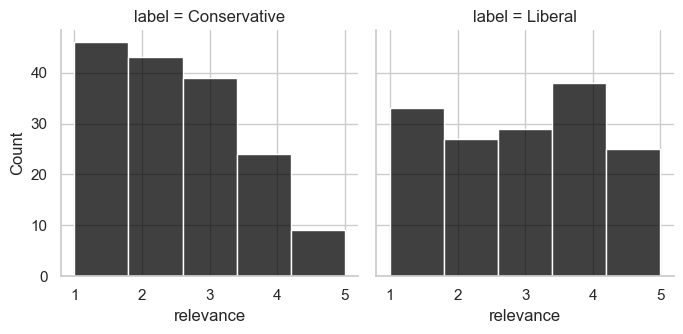

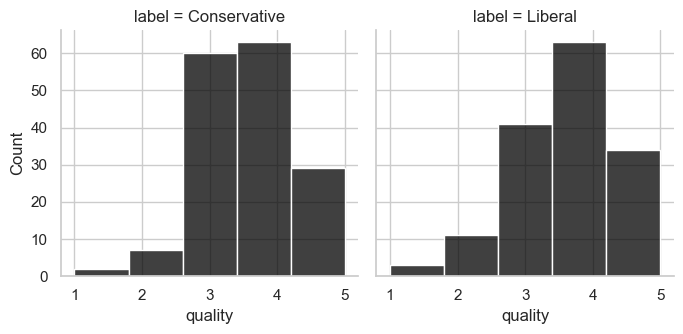

In [98]:
sns.displot(data=dataset[["relevance", "label"]], x="relevance", col="label", height=3.5, color="black", bins=5)
sns.displot(data=dataset[["quality", "label"]], x="quality", col="label", height=3.5, color="black", bins=5)

In [99]:
dataset["prefix"] = dataset.content.apply(lambda x: x[:20])
dataset.head()

,item_id,relevance,quality,content,label,prefix
0,101,4,5,The hard truth is that if you don't know what ...,Conservative,The hard truth is th
1,102,4,4,The hard truth is that the vast majority of pe...,Conservative,The hard truth is th
2,103,1,3,The hard truth is that the U.S. is going to ha...,Conservative,The hard truth is th
3,104,2,2,The hard truth is that there is no way that th...,Conservative,The hard truth is th
4,105,3,3,The hard truth is that the world's most powerf...,Conservative,The hard truth is th


In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder()

In [102]:
dataset["prefix_label"] = le.fit_transform(dataset.prefix)
dataset.head()

,item_id,relevance,quality,content,label,prefix,prefix_label
0,101,4,5,The hard truth is that if you don't know what ...,Conservative,The hard truth is th,3
1,102,4,4,The hard truth is that the vast majority of pe...,Conservative,The hard truth is th,3
2,103,1,3,The hard truth is that the U.S. is going to ha...,Conservative,The hard truth is th,3
3,104,2,2,The hard truth is that there is no way that th...,Conservative,The hard truth is th,3
4,105,3,3,The hard truth is that the world's most powerf...,Conservative,The hard truth is th,3


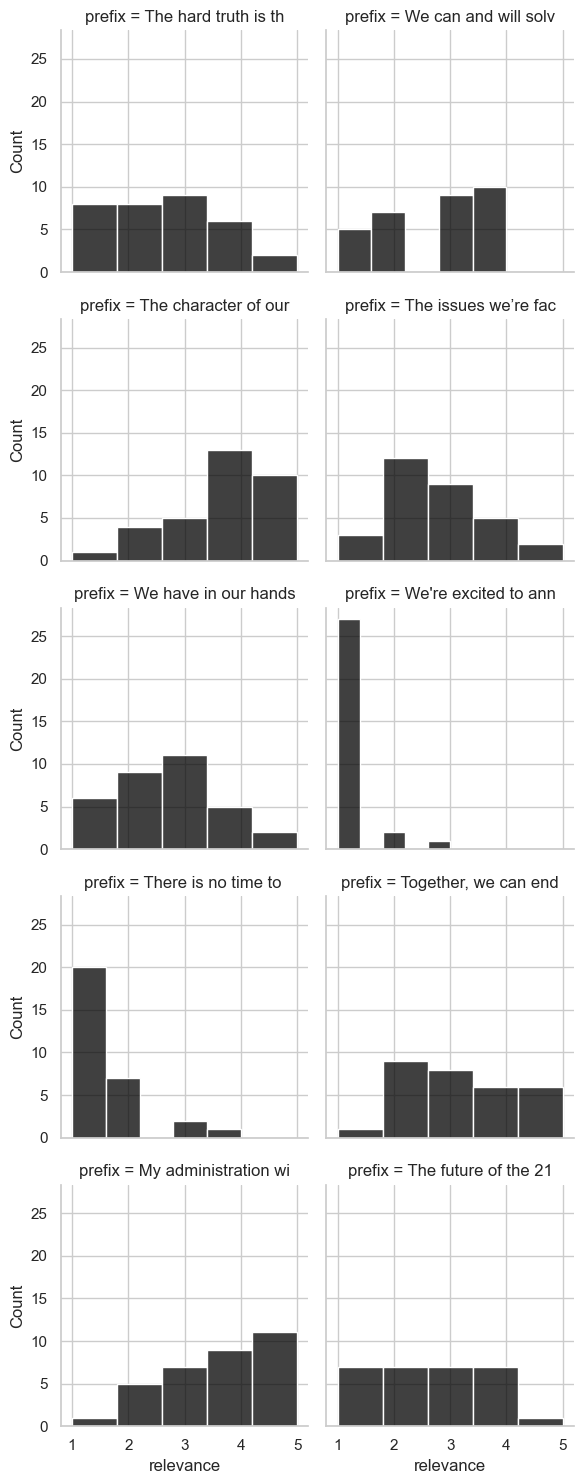

In [105]:
g = sns.FacetGrid(dataset[["relevance", "prefix"]], col="prefix", col_wrap=2, height=3)
g.map(sns.histplot, "relevance", bins=5, color="black")

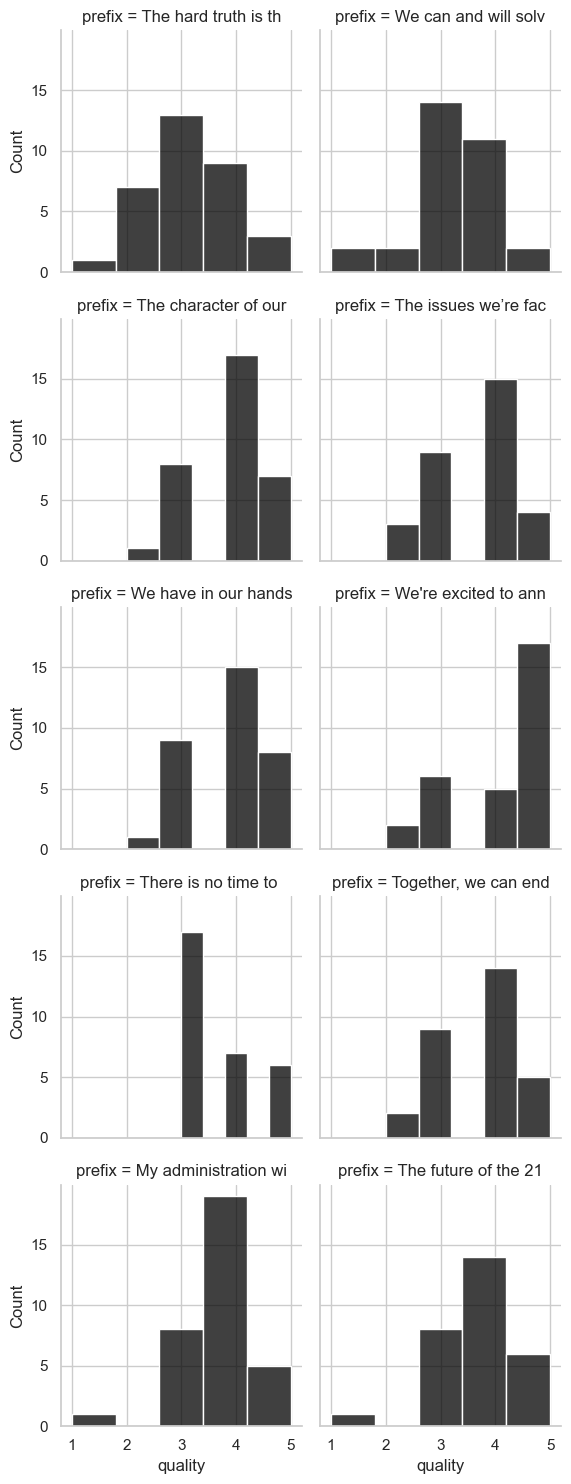

In [106]:
g = sns.FacetGrid(dataset[["quality", "prefix"]], col="prefix", col_wrap=2, height=3)
g.map(sns.histplot, "quality", bins=5, color="black")

In [111]:
dataset[["relevance", "quality", "prefix"]].groupby("prefix").describe()

relevance                                               \
                         count      mean       std  min  25%  50%  75%  max   
prefix                                                                        
My administration wi      33.0  3.727273  1.179850  1.0  3.0  4.0  5.0  5.0   
The character of our      33.0  3.818182  1.102683  1.0  3.0  4.0  5.0  5.0   
The future of the 21      29.0  2.586207  1.210585  1.0  2.0  3.0  4.0  5.0   
The hard truth is th      33.0  2.575758  1.225518  1.0  2.0  3.0  3.0  5.0   
The issues we’re fac      31.0  2.709677  1.070624  1.0  2.0  3.0  3.0  5.0   
There is no time to       30.0  1.466667  0.776079  1.0  1.0  1.0  2.0  4.0   
Together, we can end      30.0  3.233333  1.194335  1.0  2.0  3.0  4.0  5.0   
We can and will solv      31.0  2.774194  1.086575  1.0  2.0  3.0  4.0  4.0   
We have in our hands      33.0  2.636364  1.140674  1.0  2.0  3.0  3.0  5.0   
We're excited to ann      30.0  1.133333  0.434172  1.0  1.0  1.0  1.0  3.0   

                     quality                                                
                       count      mean       std  min   25%  50%  75%  max  
prefix                                                                      
My administration wi    33.0  3.818182  0.808337  1.0  3.00  4.0  4.0  5.0  
The character of our    33.0  3.909091  0.765001  2.0  3.00  4.0  4.0  5.0  
The future of the 21    29.0  3.827586  0.889180  1.0  3.00  4.0  4.0  5.0  
The hard truth is th    33.0  3.181818  0.982807  1.0  3.00  3.0  4.0  5.0  
The issues we’re fac    31.0  3.645161  0.838586  2.0  3.00  4.0  4.0  5.0  
There is no time to     30.0  3.633333  0.808717  3.0  3.00  3.0  4.0  5.0  
Together, we can end    30.0  3.733333  0.827682  2.0  3.00  4.0  4.0  5.0  
We can and will solv    31.0  3.290323  0.937854  1.0  3.00  3.0  4.0  5.0  
We have in our hands    33.0  3.909091  0.804815  2.0  3.00  4.0  4.0  5.0  
We're excited to ann    30.0  4.233333  1.006302  2.0  3.25  5.0  5.0  5.0

In [126]:
import numpy as np

In [143]:
dataset[dataset["label"] == "Conservative"][["item_id", "relevance", "quality"]].groupby("item_id").aggregate(np.mean).sort_values(by=["relevance", "quality"])

,relevance,quality
item_id,,
128,1.000000,2.666667
133,1.000000,3.000000
130,1.000000,3.333333
135,1.000000,3.333333
132,1.000000,4.000000
131,1.000000,4.333333
127,1.000000,4.666667
126,1.000000,5.000000
148,1.250000,3.000000


In [147]:
dataset.loc[dataset["item_id"] == 128].content.value_counts()

We're excited to announce that this year's event will be held during Microsoft's Build 2017 event on June 7-8, 2017 in the Redmond campus. the first three days will be free to attend, " for everyone with a badge, and " for anyone with one. " to attend this year, everyone will be able    3
Name: content, dtype: int64

In [136]:
dataset.loc[dataset["item_id"] == 128].content.unique()[0]

'We\'re excited to announce that this year\'s event will be held during Microsoft\'s Build 2017 event on June 7-8, 2017 in the Redmond campus. the first three days will be free to attend, " for everyone with a badge, and " for anyone with one. " to attend this year, everyone will be able'

In [137]:
dataset[dataset["label"] == "Conservative"][["item_id", "relevance", "quality"]].groupby("item_id").aggregate(np.mean).sort_values(by=["relevance", "quality"], ascending=False)

,relevance,quality
item_id,,
113,4.333333,4.333333
115,4.250000,4.250000
142,4.250000,3.000000
114,4.000000,4.666667
144,4.000000,3.666667
145,4.000000,3.666667
110,3.666667,3.666667
111,3.666667,3.666667
105,3.333333,3.666667


In [148]:
dataset.loc[dataset["item_id"] == 113].content.value_counts()

The character of our nation is based, as I mentioned before, upon the character of our fathers and mothers — the people who brought up the American people to become the great powers of their time — the people who came before us with their ideals, their hopes, and their aspirations. Our fathers came here, and our mother and grandparents    3
Name: content, dtype: int64

In [138]:
dataset.loc[dataset["item_id"] == 113].content.unique()[0]

'The character of our nation is based, as I mentioned before, upon the character of our fathers and mothers — the people who brought up the American people to become the great powers of their time — the people who came before us with their ideals, their hopes, and their aspirations. Our fathers came here, and our mother and grandparents'

In [139]:
dataset[dataset["label"] == "Liberal"][["item_id", "relevance", "quality"]].groupby("item_id").aggregate(np.mean).sort_values(by=["relevance", "quality"])

,relevance,quality
item_id,,
152,1.000000,2.500000
184,1.000000,4.333333
179,1.000000,4.666667
180,1.000000,4.666667
176,1.000000,5.000000
177,1.000000,5.000000
183,1.333333,3.000000
182,1.333333,4.333333
178,1.333333,4.666667


In [149]:
dataset.loc[dataset["item_id"] == 152].content.value_counts()

The hard truth is that the vast majority are either not in the top 20, not anywhere near the top 20, or are not in the top 20. And this is what really makes the numbers so interesting. So why do they exist? Well, they are designed for a certain set of people – namely the ones    4
Name: content, dtype: int64

In [140]:
dataset.loc[dataset["item_id"] == 152].content.unique()[0]

'The hard truth is that the vast majority are either not in the top 20, not anywhere near the top 20, or are not in the top 20. And this is what really makes the numbers so interesting. So why do they exist? Well, they are designed for a certain set of people – namely the ones'

In [141]:
dataset[dataset["label"] == "Liberal"][["item_id", "relevance", "quality"]].groupby("item_id").aggregate(np.mean).sort_values(by=["relevance", "quality"], ascending=False)

,relevance,quality
item_id,,
192,5.000000,4.666667
162,5.000000,4.000000
189,4.666667,4.666667
187,4.666667,4.000000
190,4.666667,4.000000
164,4.333333,4.333333
196,4.333333,4.000000
169,4.333333,3.333333
165,4.333333,3.000000


In [150]:
dataset.loc[dataset["item_id"] == 192].content.value_counts()

My administration will always fight for America and its people. We are the only administration in history to repeal discriminatory immigration laws, protect American workers and our environment, fight for the American middle class, expand opportunities for young people, and end taxpayer subsidies to private schools, including voucher programs for the poor. In order to help the most    3
Name: content, dtype: int64

In [142]:
dataset.loc[dataset["item_id"] == 192].content.unique()[0]

'My administration will always fight for America and its people. We are the only administration in history to repeal discriminatory immigration laws, protect American workers and our environment, fight for the American middle class, expand opportunities for young people, and end taxpayer subsidies to private schools, including voucher programs for the poor. In order to help the most'